## Secrets in bilibili video covers:
    Work on the videos in the bilibili hot list to take insights into the connection between the thumbnail image styles and the genres of these videos!

### Work Flow:
Pictures ->(1) Feature Vectors ->(2) Dis/Similarity Matrix ->(3) Graph ->(4) Community ->(5) Visualization ->(6) Analysis

In [1]:
import feature
import palsgraph
import networkx as nx
import numpy as np
import scipy as sc
import itertools
import matplotlib.pyplot as plt
import feature2graph
from scipy.spatial.distance import cdist,squareform
# import area for every member to add their source code

In [2]:
# parameters
#categories = ['animal','animation','dance','fashion','food','game','kichiku','knowledge','life','music','tech']
categories = ['animal','dance','food','knowledge','fashion','tech','music']
num_train_per_cat =100
num_pictures = len(categories)*num_train_per_cat
data_path = './M3/'
Iteration='5'

#### (1）HOG and Yolov3 to extract features
Input: pictures or their paths. Output: Feature Vectors possibly

In [3]:
# load data
image_paths,labels,genres = feature.get_image_paths(data_path, categories, num_train_per_cat)
# get feature vectors using different methods
features = feature.get_feature_hog(image_paths)   # using hog to extract 

# read data from files 
objects,areas,scores,text = feature2graph.read_features(num_train_per_cat,categories)
# remove 'hard' pictures
objects_new,areas_new,scores_new,text_new,index = feature2graph.remove_hard(objects, areas,scores,text)
#print(objects)
labels = feature2graph.remove_labels(index,labels)
num_pictures -= len(index)
print(num_pictures)

679


In [4]:
# calculate vectors
elements = ['person','traffic','animal','package','sports','food','furniture','tech','other','text']
vectors = feature2graph.get_vectors(objects_new, elements,areas_new,scores_new,text_new)
vectors = feature2graph.normalize(vectors)
for i in range(len(vectors)):
    print(labels[i],vectors[i],'\n')


animal1 [0.8175184984231021, 0.0, 0.3075915595186961, 0.30558099321288107, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

animal2 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

animal4 [0.018130125521457915, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25103538374101486] 

animal5 [0.11134943767061549, 0.0, 1.0, 0.0, 0.0, 0.0, 0.7715739994384289, 0.0, 0.0, 0.0] 

animal6 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

animal8 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.051548304568765524] 

animal10 [0.45007258623935714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

animal11 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

animal12 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

animal13 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

animal14 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

animal15 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

animal16 [0.10761566895160547, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1336771537545016] 

animal17 [1.0, 0.0, 0.0, 0


knowledge78 [0.1829856835396595, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

knowledge79 [0.5924026401772631, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

knowledge80 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8192831842182811] 

knowledge81 [0.8453829220902509, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0] 

knowledge82 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

knowledge83 [1.0, 0.0, 0.0, 0.0, 0.462954575352711, 0.0, 0.0, 0.0, 0.0, 0.0] 

knowledge84 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

knowledge85 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

knowledge86 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.9551044842720613] 

knowledge87 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

knowledge88 [0.27658632894749474, 0.0, 0.0, 0.06406406896151721, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

knowledge89 [0.4385652856487207, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

knowledge90 [0.40050185858254017, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

kn

tech39 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.27451341111805067, 0.5484639827790383] 

tech40 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

tech42 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

tech43 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.8149620644148705] 

tech44 [0.2143772135633726, 0.0, 0.722557024372213, 0.0, 0.0, 0.18635599723838628, 0.3794038582861393, 0.0, 0.0, 1.0] 

tech45 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31281949173311085, 0.0, 0.4667562411991833] 

tech46 [0.034665941564860026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.08658145969853505] 

tech47 [0.17175449643685609, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 

tech48 [0.6907327200046912, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.656480322364367] 

tech49 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.8979087565637746] 

tech50 [0.015411813851660192, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14324187664245966, 0.0, 1.0] 

tech51 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.662285355839293, 1.0] 

tec

#### (2) Covariance/ Euclidean Distance/Gaussian to get Dis/Similarity Matrix
Input: featurer vectors.Output: dis/simlarity matrix.

if step(1) has directly got the output, then jump to the next step.

In [5]:
# using Euclidean distance to calculate distance/similarity
# distance = feature.get_distance(features,num_pictures) 

distance = feature.get_distance(vectors,num_pictures)
print(distance)

[[0.         1.49704565 1.33145746 ... 0.50314372 1.69845362 0.63155005]
 [1.49704565 0.         0.25168922 ... 1.49211211 1.05675336 1.52800445]
 [1.33145746 0.25168922 0.         ... 1.33109927 1.08631263 1.43922832]
 ...
 [0.50314372 1.49211211 1.33109927 ... 0.         1.63089472 0.72782415]
 [1.69845362 1.05675336 1.08631263 ... 1.63089472 0.         1.66379585]
 [0.63155005 1.52800445 1.43922832 ... 0.72782415 1.66379585 0.        ]]


#### (3) Threshold or some other ways
Input: dis/similarity matrix.
Output: different ways to describe a graph.

some code in Kal's homework may help to find the appropriate threshold.(show the histogram of the data,and then test)

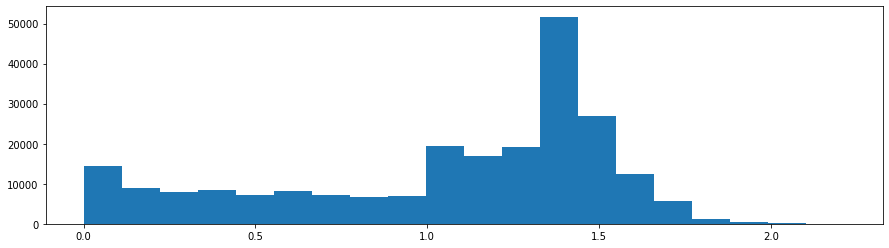

In [6]:
# homework code to visualize similarity matrix in histogram
plt.figure(figsize=(15, 4))
_ = plt.hist(squareform(distance), bins=20)


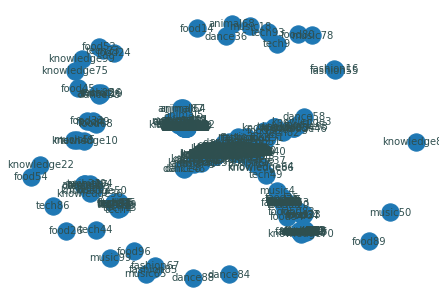

In [7]:
threshold = 0.4 # waiting to be tested
adjmat = feature.get_graph(distance,threshold)
#feature.write_edgestxt(num_pictures,adjmat)   # write edges information into a txt file
# help to visualize graph for a simple look
G = palsgraph.make_graph(adjmat, labels=labels, show_singletons=True)
nx.draw(G, with_labels=True,font_size=10,font_color='darkslategray',edge_color='gray')

**Perform the clustering**

#### (4) Different Community Detection Algorithms
Input: graph. Output: community in a graph


**Lode data from file**


In [8]:
# #Bruce: using data from the edge.tat file


# edges = np.array([(str(x), str(y)) for (x, y) in np.genfromtxt('../Documents/GitHub/CD-02/edges.txt', delimiter=' ', dtype=np.integer)])

# # Convert the names of the vertices into matrix indices, and vice versa
# idx2node = dict(list(enumerate(np.unique(edges.reshape(-1,)))))
# node2idx = {str(v): k for k, v in idx2node.items()}
# adjlabels=labels
# #adjlabels = [idx2node[idx] for idx in range(len(idx2node))]

# size = len(idx2node.keys())
# adjmat = np.zeros((size, size))
# for i in range(edges.shape[0]):
#     adjmat[node2idx[edges[i,0]], node2idx[edges[i,1]]] = adjmat[node2idx[edges[i,1]], node2idx[edges[i,0]]] = 1
    
# adjG = palsgraph.make_graph(adjmat, labels=adjlabels, show_singletons=False)

**process data from the part above provided by Tingyu**

In [9]:
idx2node=dict(list(enumerate( labels)))
node2idx = {str(v): k for k, v in idx2node.items()}
adjlabels=labels


##### Girvan-Newman
Girvan-Newman accepts an unweighted graph as input. Hence, we load the file  𝚎𝚍𝚐𝚎𝚜.𝚝𝚡𝚝 , which contains a list of unweighted edges, and translate it into an adjacency matrix.


In [10]:
from networkx.algorithms.community.centrality import girvan_newman

comp = girvan_newman(G)

gn_communities = [c for c in itertools.islice(comp, 1)][0]

#### MCL algorithm


In [36]:
import markov_clustering as mc

def restore_labels(communities, idx2node):
    _communities = []
    for community in communities:
        _communities.append([idx2node[idx] for idx in community])
    return _communities

matrix = nx.to_scipy_sparse_matrix(G)

result = mc.run_mcl(matrix)
mcl_communities = mc.get_clusters(result)
mcl_communities = restore_labels(mcl_communities, idx2node)

[(0, 44, 91, 111, 118, 125, 145, 147, 154, 159, 160, 167, 171, 176, 179, 180, 192, 197, 201, 202, 244, 266, 268, 277, 287, 288, 300, 303, 343, 350, 366, 367, 387, 389, 394, 395, 396, 397, 401, 402, 404, 405, 407, 409, 410, 411, 415, 417, 421, 422, 423, 424, 426, 429, 432, 436, 441, 446, 453, 457, 458, 459, 460, 466, 473, 477, 479, 480, 484, 485, 487, 498, 531, 545, 549, 557, 587, 590, 591, 597, 599, 611, 612, 618, 626, 632, 638, 639, 649, 650, 661, 664, 669, 678), (1, 2, 4, 5, 7, 9, 10, 11, 12, 14, 17, 18, 19, 21, 22, 24, 26, 27, 28, 29, 30, 32, 34, 35, 38, 39, 40, 41, 45, 46, 48, 49, 52, 53, 54, 55, 58, 59, 63, 64, 65, 66, 68, 69, 71, 74, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 102, 182, 235, 247, 259, 349, 463), (3, 37, 42, 56, 57, 70, 78), (6, 16, 25, 31, 47, 50, 60, 73, 77, 93, 100, 108, 109, 113, 114, 121, 122, 130, 131, 135, 137, 138, 146, 151, 158, 162, 166, 170, 175, 177, 187, 196, 198, 207, 208, 209, 210, 216, 219, 220, 227, 230, 242, 248, 252, 253, 257, 263, 264, 265,

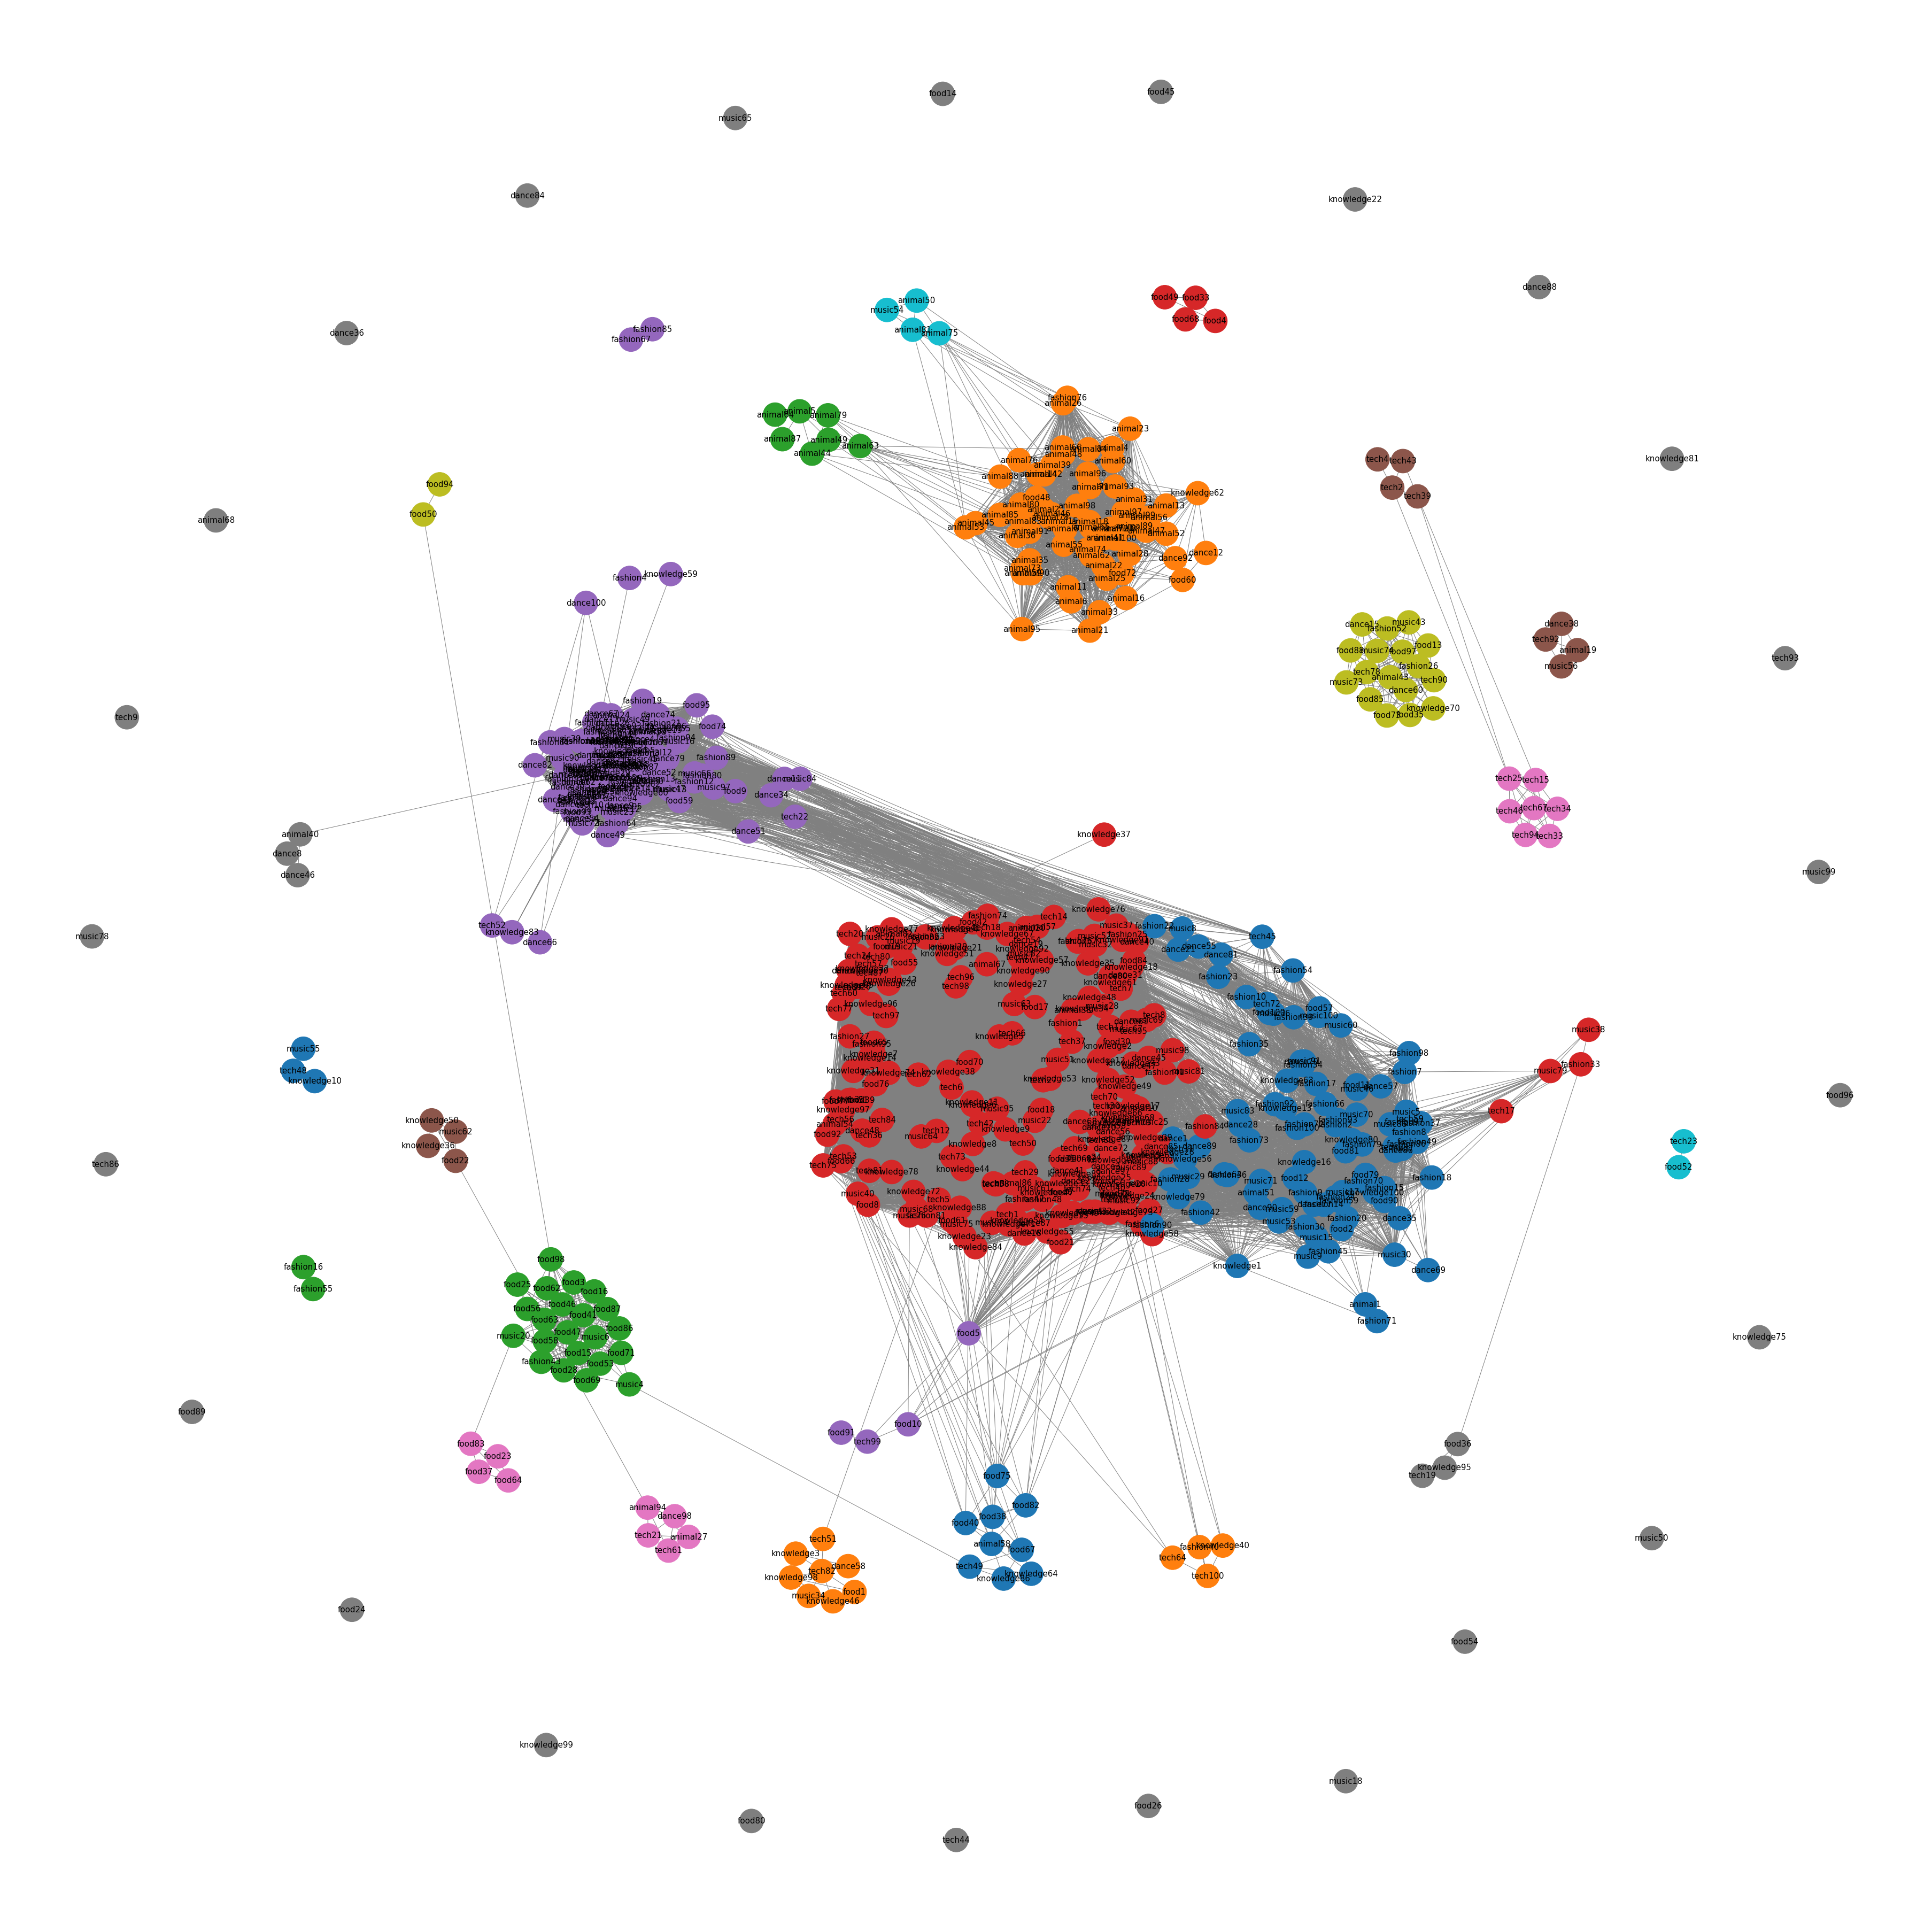

In [37]:
pos = palsgraph.getpos(G, mcl_communities)
color_map = palsgraph.gen_colormap(G, mcl_communities)
plt.figure(figsize=(50, 50))
nx.draw(G, pos=pos, with_labels=True, node_size=2000,font_size=15,node_color=color_map, edge_color='grey')
plt.savefig('./figures/Iteration'+Iteration+'/MCL.jpg')
plt.show()

##### Single-Linkage Clustering
using the code prof.Kal provides 

input: distance matrix and node label list

In [38]:
#Bruce: using the distance Tingyu provided as distance matrix, labels as the label list
from scipy import cluster  
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform

linkages= linkage(squareform(distance), 'ward')

**Visualize dendogram**

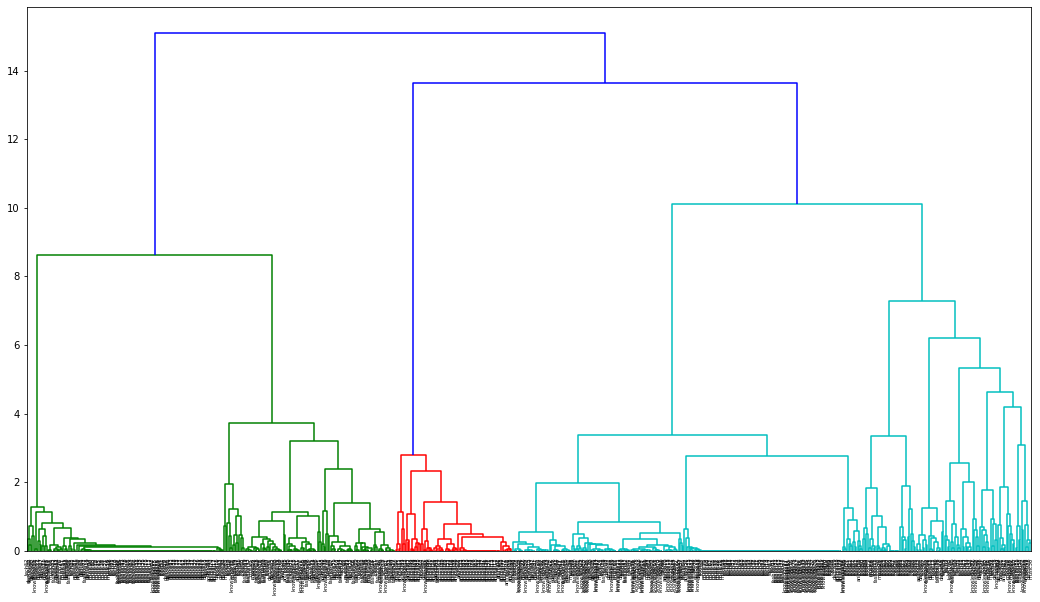

In [39]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(18, 10))
dn = dendrogram(linkages, labels=labels)
plt.savefig('./figures/Iteration'+Iteration+'/simple_linkage.jpg')
plt.show()

[ 0  1  1  1  1  1  2  1  3  1  1  1  1  3  1  4  2  1  1  1  3  1  1  5
  1  6  1  1  1  1  1  6  1  7  1  1  8  1  1  1  1  1  1  1  0  1  1  6
  1  1  6  6  1  1  1  1  1  1  1  1  2  0  3  1  1  1  1  1  1  1  1  1
  1  1  1  3  1  6  1  1  1  1  1  1  5  1  1  1  1  1  1  2  3  2  3  3
  3  3  7  3  2  7  1  3  3  8  3  3  2  6  3  7  3  2  2  3  3  3  0  3
  3  2  2  3  7  0  9  3  4  3  2  2  3  3  3  2  7  2  6  3  3  7  3  3
  3  7  2  7  9  3  8  2  3  3  0  3  3  3  2  0  7  3  2  3  3  3  6  0
  3  7  2  7  3  3 10  2  0  2  8  2  0  3  1  3  3  3  3  2  5  3  3  9
  0 11 12 10  2  7  6  7 10  7  0  8 10 11 11  2  6  2  6  5 12 11 11  4
  6 11  3  2  2 12  3  8 10 12  6  6  6 11  6  3 12 11 11  1 12 11  3  9
 11  8  6 11  7 11  7  1  2 11 11 12  6  6  6 12 11  6 11  1  8  3  6  6
  6  2  0  5  0  6 12  2  8 11 11  8 12  0 10  6  3 11  3 12  8 11  2  7
  0  2  9  6  6  6  6  6  2 13  2  6  0  6  2  0  2  2  3  2  2  4  6  2
  2  6  6  2  3  6  6  2  6  6  6  5  1  6  2 13  6

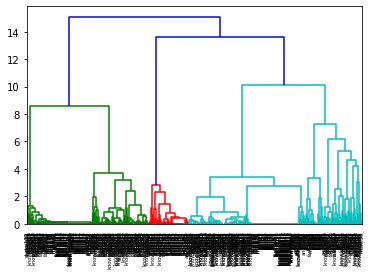

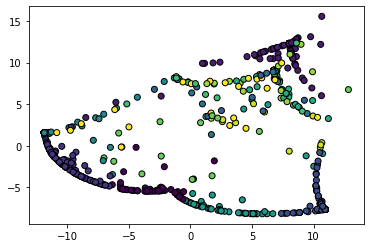

In [40]:
hierarchy.dendrogram(linkages,labels = labels)
label = cluster.hierarchy.cut_tree(linkages,height=3.2)
label = label.reshape(label.size,)
print(label)
from sklearn import decomposition as skldec
pca = skldec.PCA(n_components = 0.95)    #选择方差95%的占比
pca.fit(distance)   #主城分析时每一行是一个输入数据
result = pca.transform(distance)  #计算结果
plt.figure()  #新建一张图进行绘制
plt.scatter(result[:, 0], result[:, 1], c=label, edgecolor='k') #绘制两个主成分组成坐标的散点图
# for i in range(result[:,0].size):
#     plt.text(result[i,0],result[i,1],labels)     #在每个点边上绘制数据名称
# x_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[0]*100.0),2)   #x轴标签字符串
# y_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[1]*100.0),2)   #y轴标签字符串
# plt.xlabel(x_label)    #绘制x轴标签
# plt.ylabel(y_label)    #绘制y轴标签

##### Clique Perculation
needed input: unweighted graph 

In [41]:
#Bruce:use unweighted graph G
from networkx.algorithms.community.kclique import k_clique_communities

def get_communities(C):
    communities = []
    nodes = []
    for community in list(C):
        communities.append(list(community))
        nodes.extend(list(community))
    _G = G.copy()
    nodes_to_remove = [node for node in _G.nodes() if node not in nodes]
    for node in nodes_to_remove:
        _G.remove_node(node)        
    return communities, _G

C = k_clique_communities(G, 5)
cp_communities, cp_G = get_communities(C)

**visualize clique**

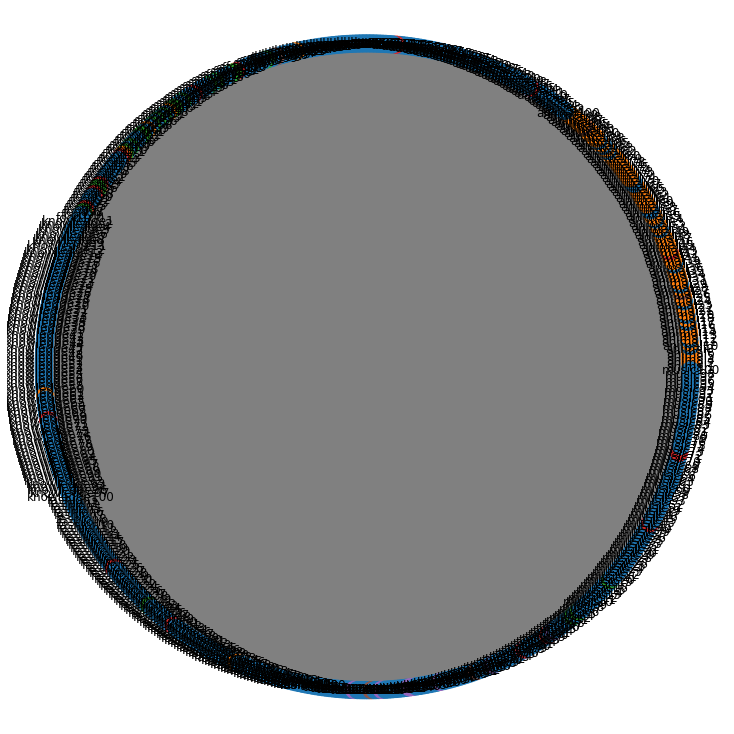

In [42]:
plt.figure(figsize=(10, 10))
color_map = palsgraph.gen_colormap(cp_G, cp_communities)
nx.draw(cp_G, pos=nx.circular_layout(cp_G), node_color=color_map, edge_color='grey', with_labels=True)

#### (5) Visualization
Input: community above. Output: different visualizations

**visualization of Girvan-Newman algorithm**

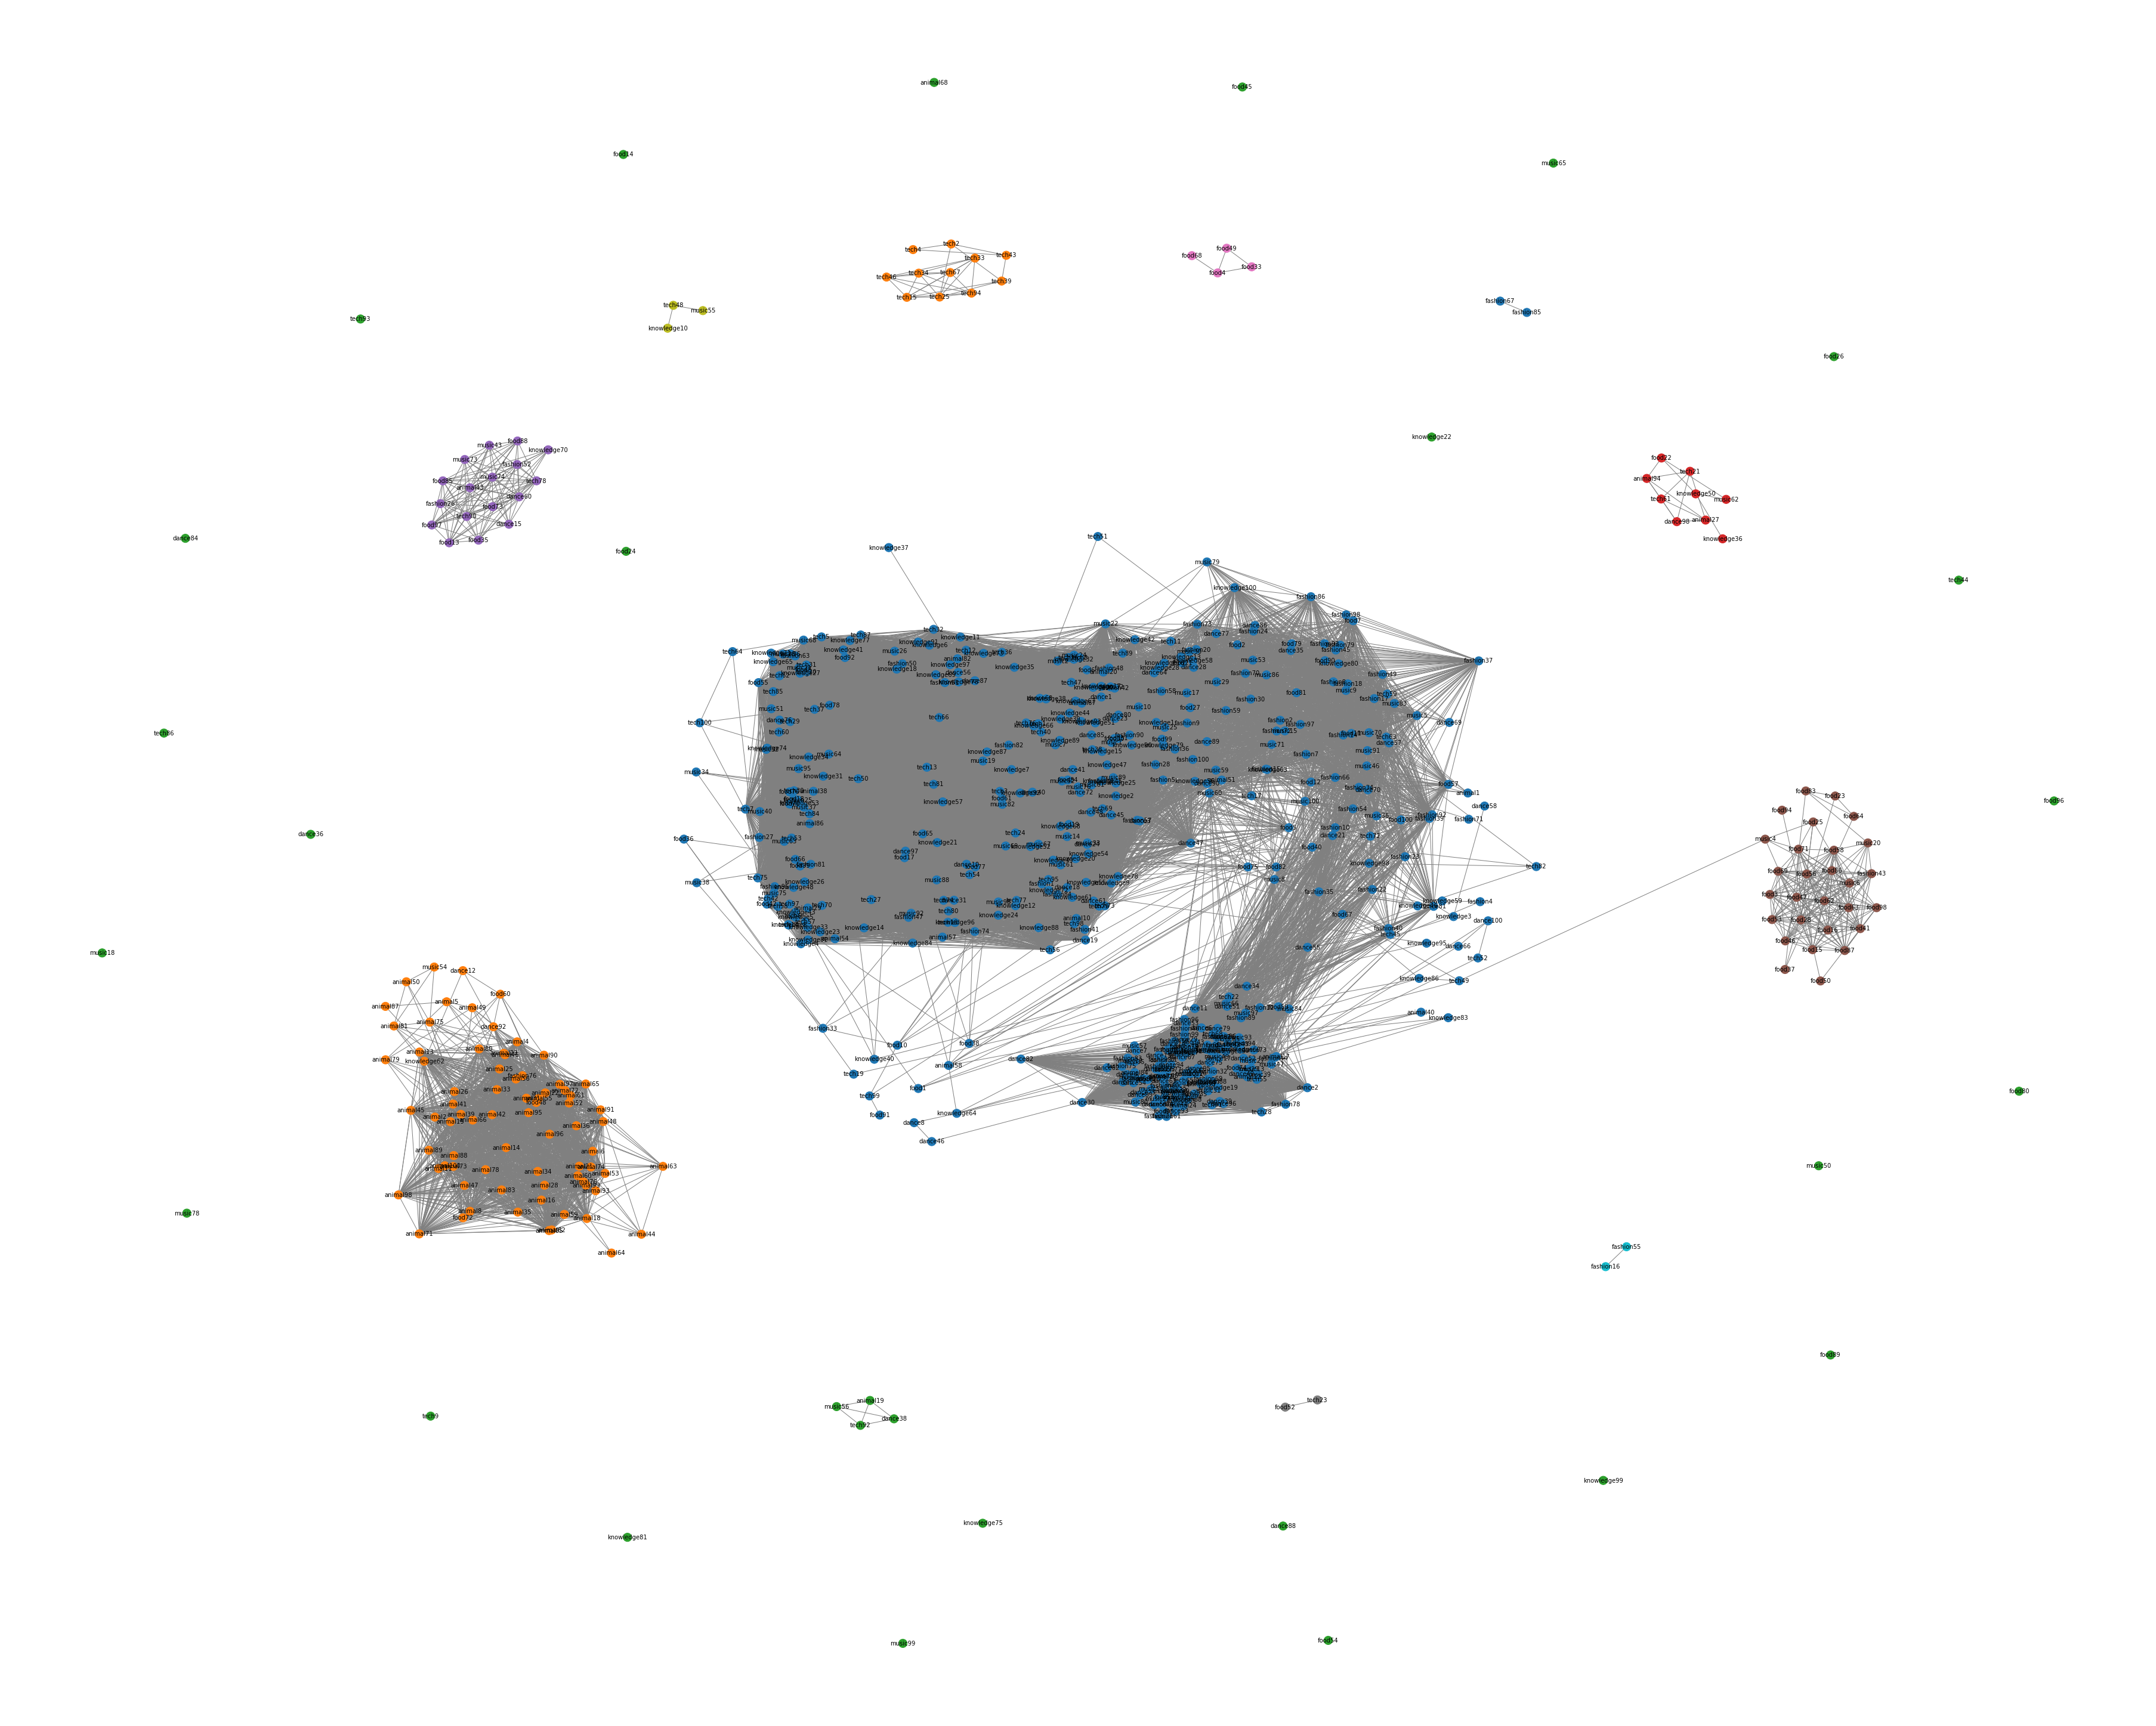

In [43]:
pos = palsgraph.getpos(G, gn_communities)
color_map = palsgraph.gen_colormap(G, gn_communities)
plt.figure(figsize=(50, 40))
nx.draw(G,node_size=200, pos=pos, with_labels=True, node_color=color_map, font_size=10,font_color='black', edge_color='grey')
plt.savefig('./figures/Iteration'+Iteration+'/GN.jpg')
plt.show()

#### (6) Analysis 
MCL analysis: write community information into text

In [44]:

i=1;  
f1=open('./community_info.txt','w')
for con in mcl_communities:
    animal=[]#
    animation=[]#
    dance=[]#
    fashion=[]
    food=[]#
    game=[]#
    kichiku=[]
    knowledge=[]
    life=[]#
    music=[]#
    tech=[]#
    size=len(con)
    for node in con:
        if(len(node)==4):
            if(node=='food'):
                food.append(node)
            elif(node=='game'):
                game.append(node)
            elif(node=='life'):
                life.append(node)
            elif(node=='tech'):
                game.append(tech)
        elif(node[0:1]=='d'):
            dance.append(node)
        elif(node[0:1]=='m'):
            music.append(node)
        elif(node[0:6]=='animal'):
            animal.append(node)
        elif(node[0:6]=='animat'):
            animation.append(node)
        elif(node[0:4]=='fash'):
            fashion.append(node)
        elif(node[0:2]=='ki'):
            kichiku.append(node)
        elif(node[0:2]=='kn'):
            knowledge.append(node)
    f1.write('\n')
    f1.write('community')
    f1.write(str(i))
    i=i+1
    if(size<=5):
        f1.write('\n')
        f1.write(str((con)))
        f1.write('\n')
        continue
    if(len(animal)>0):
        f1.write('\n')
        f1.write(str(len(animal)))
        f1.write('  ')
        f1.write(str(len(animal)/size))
        f1.write('  ')
        f1.write(str(animal))
    if(len(animation)>0):
        f1.write('\n')
        f1.write(str(len(animation)))
        f1.write(' ')
        f1.write(str(len(animation)/size))
        f1.write(' ')
        f1.write(str(animation))
    if(len(dance)>0):
        f1.write('\n')
        f1.write(str(len(dance)))
        f1.write(' ')
        f1.write(str(len(dance)/size))
        f1.write(' ')
        f1.write(str(dance))
    if(len(fashion)>0):
        f1.write('\n')
        f1.write(str(len(fashion)))
        f1.write(' ')
        f1.write(str(len(fashion)/size))
        f1.write(' ')
        f1.write(str(fashion))
    if(len(food)>0):
        f1.write('\n')
        f1.write(str(len(food)))
        f1.write(' ')
        f1.write(str(len(food)/size))
        f1.write(' ')
        f1.write(str(food))
    if(len(game)>0):
        f1.write('\n')
        f1.write(str(len(game)))
        f1.write(' ')
        f1.write(str(len(game)/size))
        f1.write(' ')
        f1.write(str(game))
    if(len(kichiku)>0):
        f1.write('\n')
        f1.write(str(len(kichiku)))
        f1.write(' ')
        f1.write(str(len(kichiku)/size))
        f1.write(' ')
        f1.write(str(kichiku))
    if(len(knowledge)>0):
        f1.write('\n')
        f1.write(str(len(knowledge)))
        f1.write(' ')
        f1.write(str(len(knowledge)/size))
        f1.write(' ')
        f1.write(str(knowledge))
    if(len(life)>0):
        f1.write('\n')
        f1.write(str(len(life)))
        f1.write(' ')
        f1.write(str(len(life)/size))
        f1.write(' ')
        f1.write(str(life))
    if(len(music)>0):
        f1.write('\n')
        f1.write(str(len(music)))
        f1.write(' ')
        f1.write(str(len(music)/size))
        f1.write(' ')
        f1.write(str(music))
    if(len(tech)>0):
        f1.write('\n')
        f1.write(str(len(tech)))
        f1.write(' ')
        f1.write(str(len(tech)/size))
        f1.write(' ')
        f1.write(str(tech))
    f1.write('\n')
    
f1.close()    

##### Break out big community into small one for analysis
there is a function that you can use at last to divide any community into sub-community; remember to set appropriate threshold

###### A function that allows you to generate community in sub-graph

In [50]:
# communities: 上一级的CD结果; vectors：上一级的feature vectors;labels：上一级的labels;
# com_idx: communities中的index（具体分解哪一个大community）
def generate_sub(communities,vectors,labels,com_idx,threshold):
    labels_sub = mcl_communities[com_idx]   # labels of sub-community
    features_sub = []; 
    for i in com_b:
        features_sub.append(vectors[labels.index(i)])
        
    # feature to graph
    dist_sub = feature.get_distance(features_sub,num_sub)
    plt.figure(figsize=(15, 4))
    _ = plt.hist(squareform(dist_sub), bins=20)
    threshold_sub = 0.1 # waiting to be tested
    adjmat_sub = feature.get_graph(dist_sub,threshold_sub)
    G_sub = palsgraph.make_graph(adjmat_sub, labels=labels_sub, show_singletons=True)
    
    # run the MCL algorithm again
    idx2node_sub=dict(list(enumerate( labels_sub)))
    node2idx_sub = {str(v): k for k, v in idx2node_sub.items()}
    matrix_sub = nx.to_scipy_sparse_matrix(G_sub)

    result_sub = mc.run_mcl(matrix_sub)
    com_sub = mc.get_clusters(result_sub)
    com_sub = restore_labels(com_sub, idx2node_sub)

    # visualization
    pos_sub = palsgraph.getpos(G_sub, com_sub)
    color_map = palsgraph.gen_colormap(G_sub, com_sub)
    plt.figure(figsize=(50, 50))
    nx.draw(G_sub, pos=pos_sub, with_labels=True, node_size=2000,font_size=15,node_color=color_map, edge_color='grey')
    plt.savefig('./figures/Iteration'+Iteration+'/MCL_sub{}.jpg'.format(com_idx))
    plt.show()
    return com_sub

choose the biggest community to rerun the whole work flow

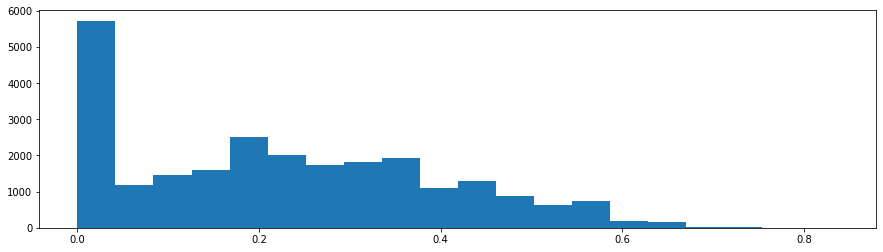

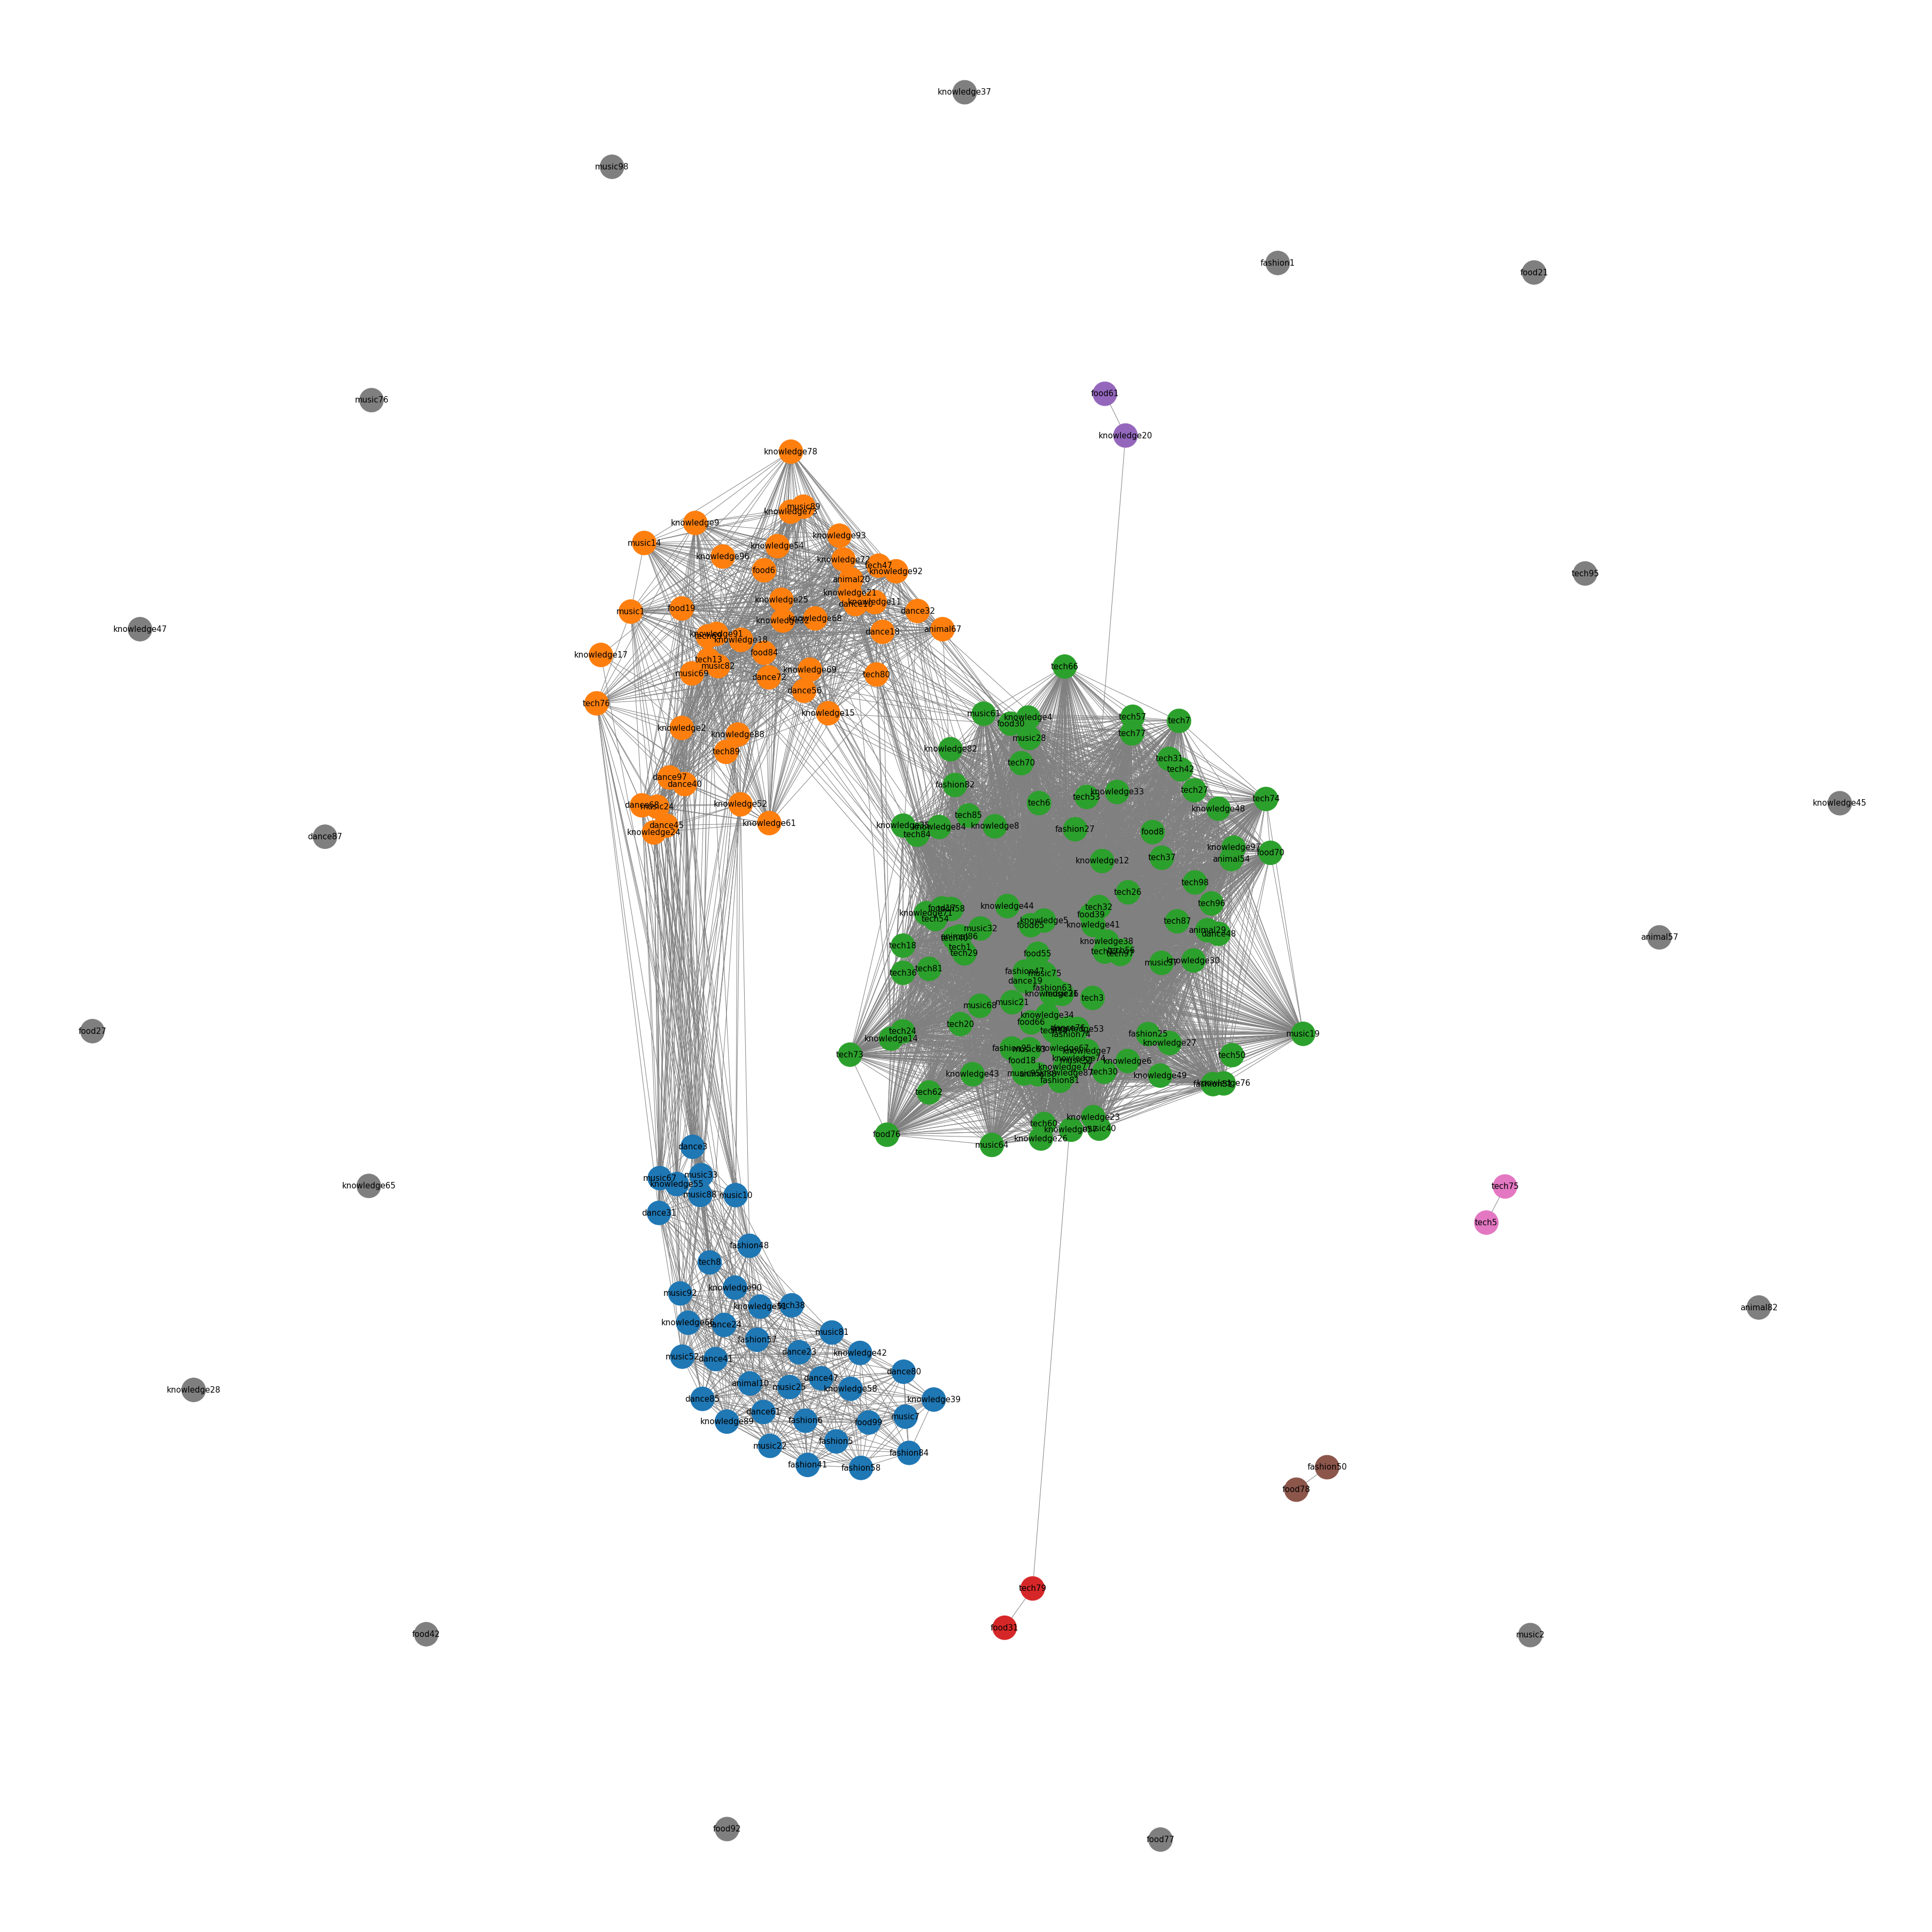

In [54]:
#print(mcl_communities)
# throw away other vertices and their feature vectors and only deal with the vertices in the largest community
com_len = [len(x) for x in mcl_communities]
num_sub = max(com_len)
com_bid = com_len.index(num_sub)
threshold_sub = 0.1
com_sub = generate_sub(mcl_communities,vectors,labels,com_bid,threshold_sub)